**Data Science Intern at CodeClause**

**Project : Movie Analysis**

**Name : S Nikitha**

In [12]:
#install kaggle
!pip install -q kaggle

In [13]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle.json': b'{"username":"sangunikitha","key":"614d7cfc0e951fb4b79c4515963baa3f"}'}

In [14]:
#create a kaggle folder
!mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [15]:
#copy the kaggle.json to the folder created
! cp kaggle.json ~/.kaggle/

In [16]:
#permission for the json to act
! chmod 600 ~/.kaggle/kaggle.json

In [18]:
#downloading the required dataset
!kaggle datasets download -d harshitshankhdhar/imdb-dataset-of-top-1000-movies-and-tv-shows

  0% 0.00/175k [00:00<?, ?B/s]
100% 175k/175k [00:00<00:00, 112MB/s]


**Removing Warnings**

In [19]:
import warnings
warnings.filterwarnings("ignore")

**Importing libraries**

In [38]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
print("Setup Complete")

Setup Complete


**Preparation of Data**

In [39]:
path = "/content/imdb-dataset-of-top-1000-movies-and-tv-shows.zip"
data = pd.read_csv(path)
data.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


**Shape of the data**

In [40]:
print("The shape of the dataset is: {} rows and {} columns".format(data.shape[0], data.shape[1]))

The shape of the dataset is: 1000 rows and 16 columns


Number of null values


In [41]:
data.isnull().sum()

Poster_Link        0
Series_Title       0
Released_Year      0
Certificate      101
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64

In [42]:
print(data['Gross'].head(1))
data['Gross'] = data['Gross'].str.replace(',', '')
print(data['Gross'].head(1))

data['Gross'] = data['Gross'].astype('float64')
data['Gross'] = data['Gross'].replace(np.nan, 0)

0    28,341,469
Name: Gross, dtype: object
0    28341469
Name: Gross, dtype: object


In [43]:
data['Gross'] = data['Gross'].astype(int)
data['Gross'].dtype

dtype('int64')

**Finding Correlation**

In [44]:
data.corr()

,IMDB_Rating,Meta_score,No_of_Votes,Gross
IMDB_Rating,1.000000,0.268531,0.494979,0.082381
Meta_score,0.268531,1.000000,-0.018507,-0.053659
No_of_Votes,0.494979,-0.018507,1.000000,0.602128
Gross,0.082381,-0.053659,0.602128,1.000000


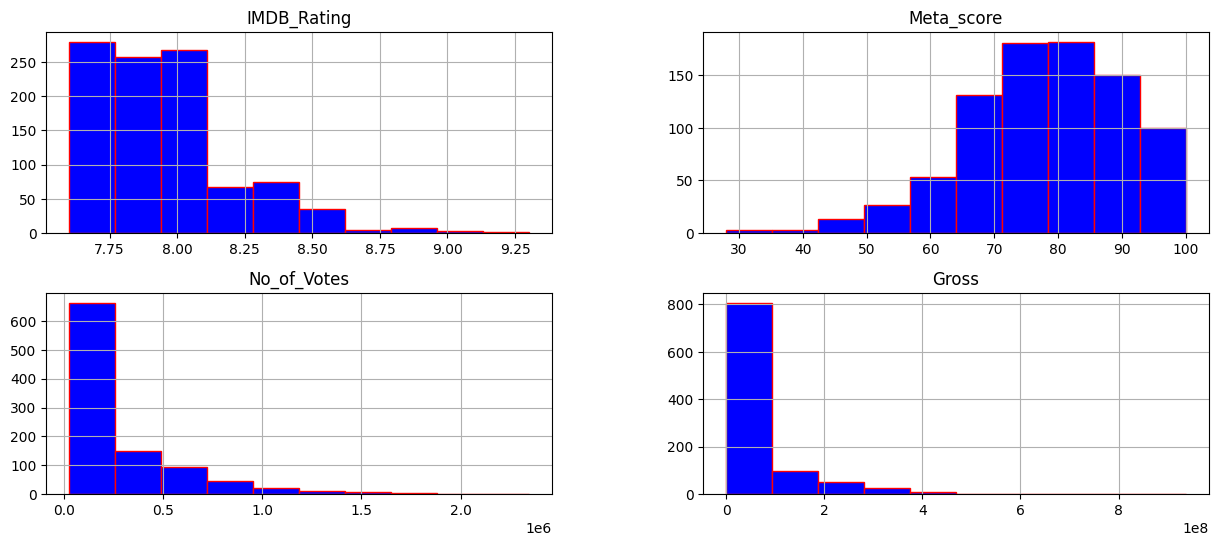

In [45]:
numerical_attributes = ['IMDB_Rating', 'Meta_score', 'No_of_Votes', 'Gross']
data[numerical_attributes].hist(figsize = (15, 6), color = 'blue', edgecolor = 'red', layout = (2, 2));

In [46]:
data.describe()

,IMDB_Rating,Meta_score,No_of_Votes,Gross
count,1000.000000,843.000000,1.000000e+03,1.000000e+03
mean,7.949300,77.971530,2.736929e+05,5.653688e+07
std,0.275491,12.376099,3.273727e+05,1.032382e+08
min,7.600000,28.000000,2.508800e+04,0.000000e+00
25%,7.700000,70.000000,5.552625e+04,4.457098e+05
50%,7.900000,79.000000,1.385485e+05,1.070275e+07
75%,8.100000,87.000000,3.741612e+05,6.153989e+07
max,9.300000,100.000000,2.343110e+06,9.366622e+08


**Top Voted Movies**

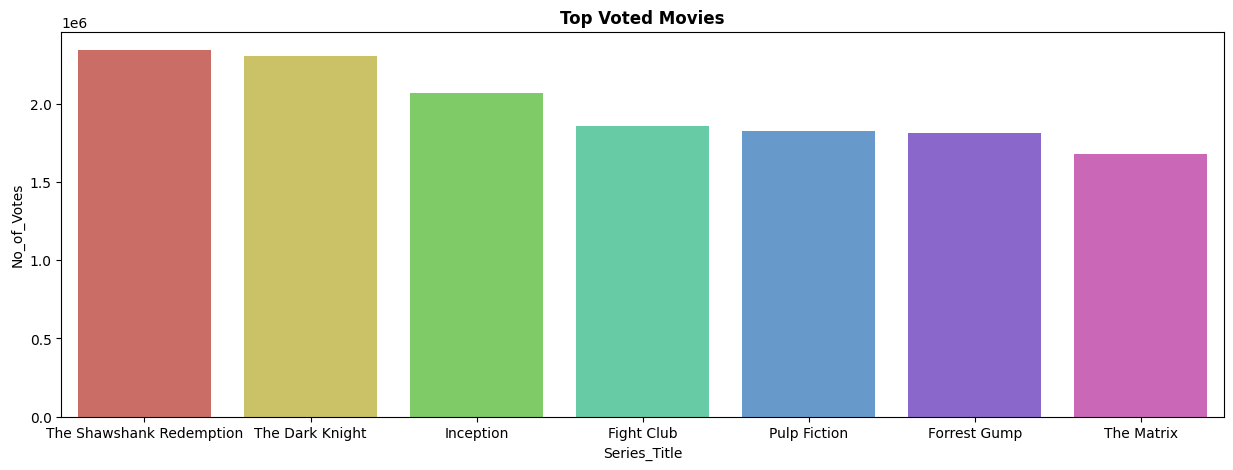

In [47]:
top_voted = data.sort_values(['No_of_Votes'], ascending = False)
fig,axs=plt.subplots(figsize=(15,5))
g=sns.barplot(x=top_voted['Series_Title'][:7],y=top_voted['No_of_Votes'][:7], palette = 'hls')
g.set_title("Top Voted Movies", weight = "bold")
plt.show()

**Top voted movie rating**

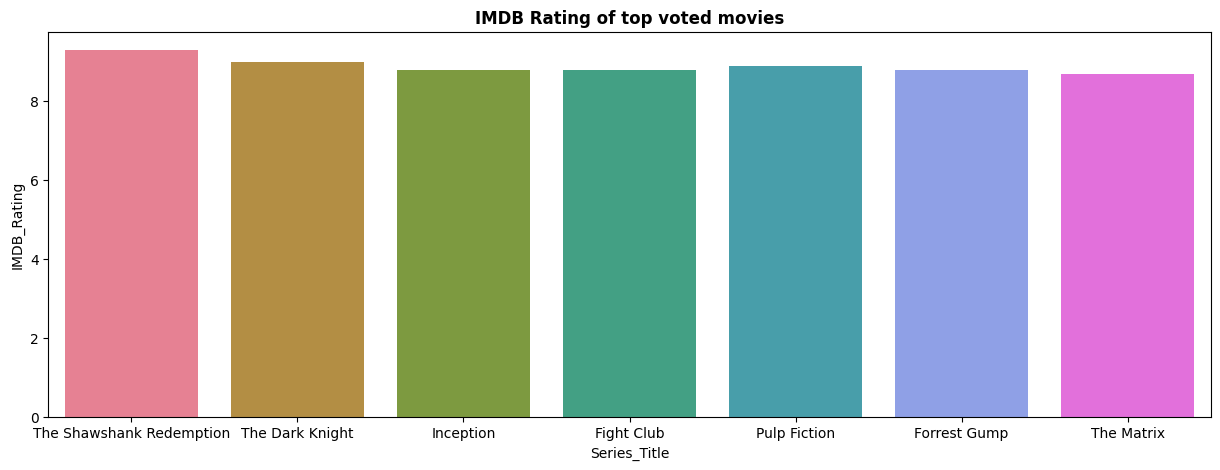

In [48]:
fig,axs=plt.subplots(figsize=(15,5))
g=sns.barplot(x=top_voted['Series_Title'][:7],y=top_voted['IMDB_Rating'][:7], palette = 'husl')
g.set_title("IMDB Rating of top voted movies", weight = "bold")
plt.show()

**Top voted movie metascores**

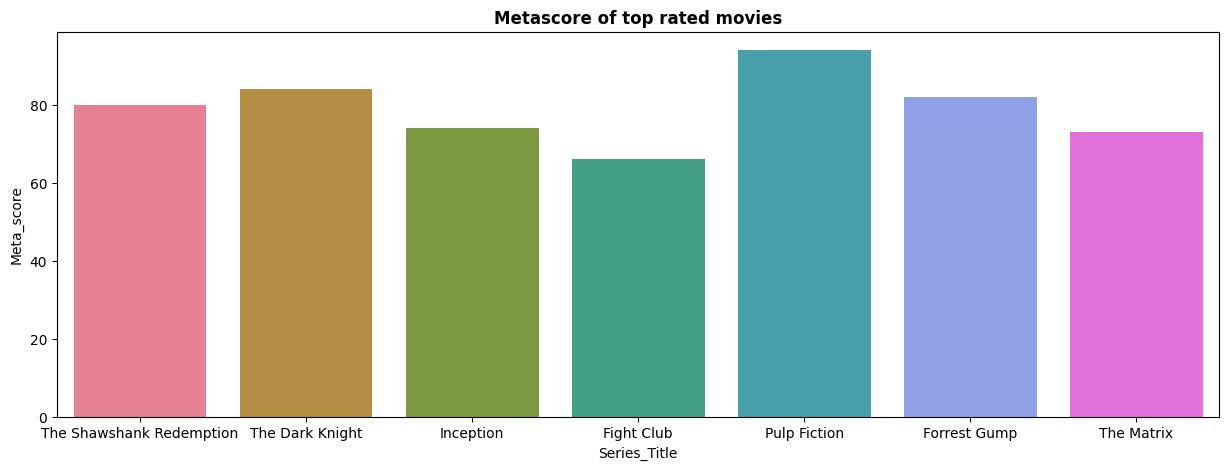

In [49]:
fig,axs=plt.subplots(figsize=(15,5))
g=sns.barplot(x=top_voted['Series_Title'][:7],y=top_voted['Meta_score'][:7], palette = 'husl')
g.set_title("Metascore of top rated movies", weight = "bold")
plt.show()

In [50]:
data.loc[data['Gross']==0]

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
18,https://m.media-amazon.com/images/M/MV5BNjViNW...,Hamilton,2020,PG-13,160 min,"Biography, Drama, History",8.6,The real life of one of America's foremost fou...,90.0,Thomas Kail,Lin-Manuel Miranda,Phillipa Soo,Leslie Odom Jr.,Renée Elise Goldsberry,55291,0
20,https://m.media-amazon.com/images/M/MV5BOTc2ZT...,Soorarai Pottru,2020,U,153 min,Drama,8.6,"Nedumaaran Rajangam ""Maara"" sets out to make t...",NaN,Sudha Kongara,Suriya,Madhavan,Paresh Rawal,Aparna Balamurali,54995,0
30,https://m.media-amazon.com/images/M/MV5BYjBmYT...,Seppuku,1962,NaN,133 min,"Action, Drama, Mystery",8.6,When a ronin requesting seppuku at a feudal lo...,85.0,Masaki Kobayashi,Tatsuya Nakadai,Akira Ishihama,Shima Iwashita,Tetsurô Tanba,42004,0
32,https://m.media-amazon.com/images/M/MV5BZjc4ND...,It's a Wonderful Life,1946,PG,130 min,"Drama, Family, Fantasy",8.6,An angel is sent from Heaven to help a despera...,89.0,Frank Capra,James Stewart,Donna Reed,Lionel Barrymore,Thomas Mitchell,405801,0
46,https://m.media-amazon.com/images/M/MV5BZmY2Nj...,Hotaru no haka,1988,U,89 min,"Animation, Drama, War",8.5,A young boy and his little sister struggle to ...,94.0,Isao Takahata,Tsutomu Tatsumi,Ayano Shiraishi,Akemi Yamaguchi,Yoshiko Shinohara,235231,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
993,https://m.media-amazon.com/images/M/MV5BYTE4YW...,Blowup,1966,A,111 min,"Drama, Mystery, Thriller",7.6,A fashion photographer unknowingly captures a ...,82.0,Michelangelo Antonioni,David Hemmings,Vanessa Redgrave,Sarah Miles,John Castle,56513,0
995,https://m.media-amazon.com/images/M/MV5BNGEwMT...,Breakfast at Tiffany's,1961,A,115 min,"Comedy, Drama, Romance",7.6,A young New York socialite becomes interested ...,76.0,Blake Edwards,Audrey Hepburn,George Peppard,Patricia Neal,Buddy Ebsen,166544,0
996,https://m.media-amazon.com/images/M/MV5BODk3Yj...,Giant,1956,G,201 min,"Drama, Western",7.6,Sprawling epic covering the life of a Texas ca...,84.0,George Stevens,Elizabeth Taylor,Rock Hudson,James Dean,Carroll Baker,34075,0
998,https://m.media-amazon.com/images/M/MV5BZTBmMj...,Lifeboat,1944,NaN,97 min,"Drama, War",7.6,Several survivors of a torpedoed merchant ship...,78.0,Alfred Hitchcock,Tallulah Bankhead,John Hodiak,Walter Slezak,William Bendix,26471,0


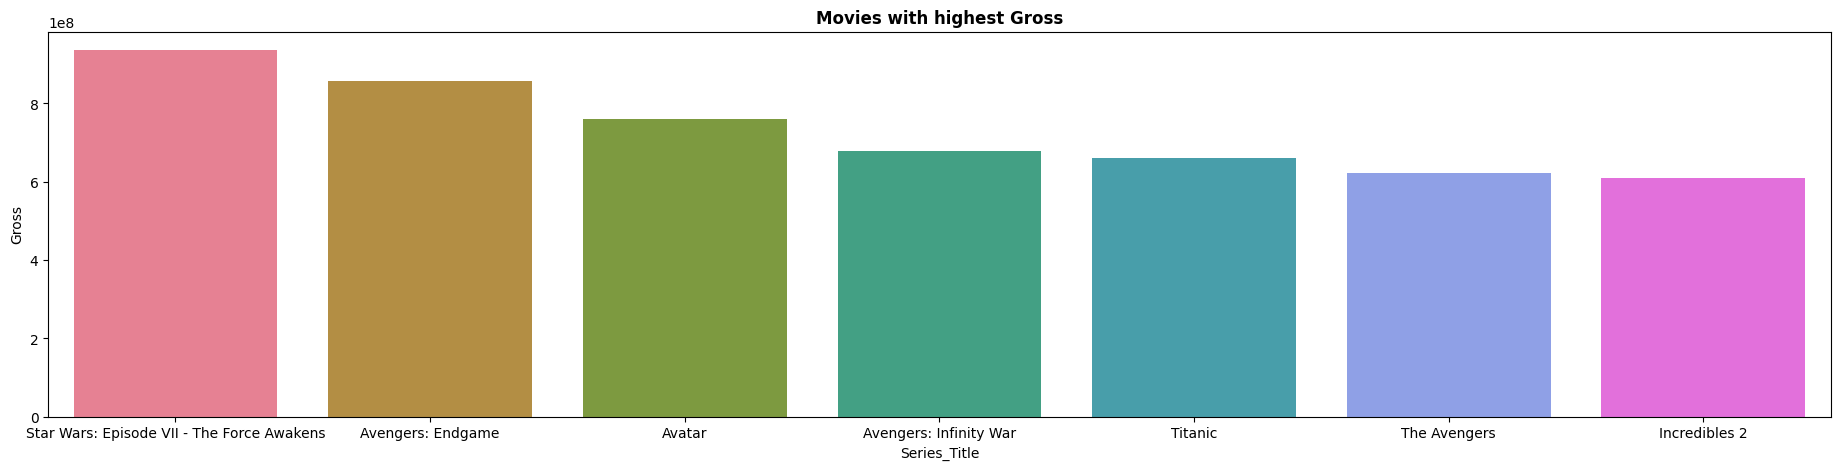

In [51]:
highest_earning = data.sort_values(['Gross'], ascending = False)
fig,axs=plt.subplots(figsize=(23,5))
g=sns.barplot(x=highest_earning['Series_Title'][:7],y=highest_earning['Gross'][:7], palette = 'husl')
g.set_title("Movies with highest Gross", weight = "bold")
plt.show()

**Top Gross Movies**

**Top Gross rated movies**

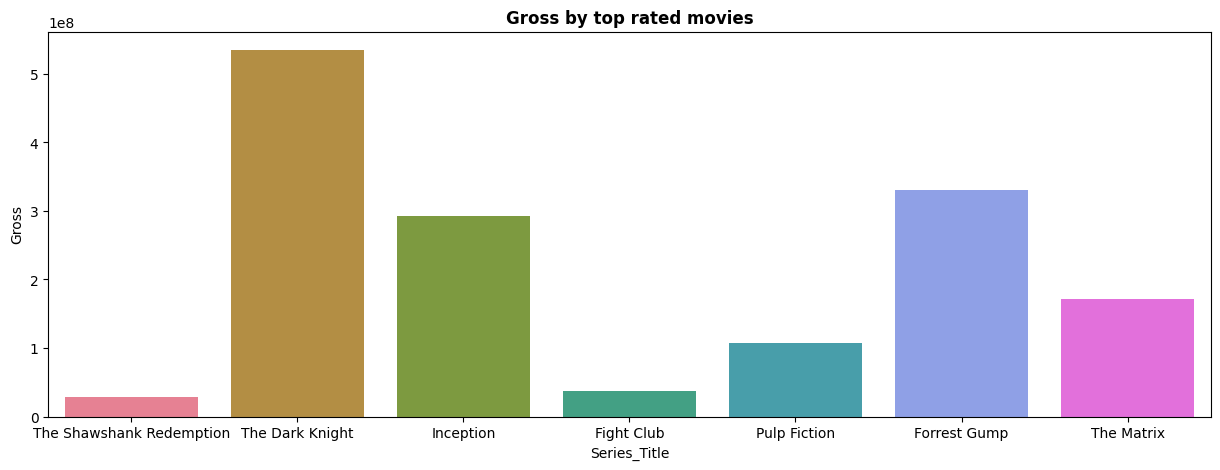

In [52]:
fig,axs=plt.subplots(figsize=(15,5))
g=sns.barplot(x=top_voted['Series_Title'][:7],y=top_voted['Gross'][:7], palette = 'husl')
g.set_title("Gross by top rated movies", weight = "bold")
plt.show()

**Year with maximum movies released**

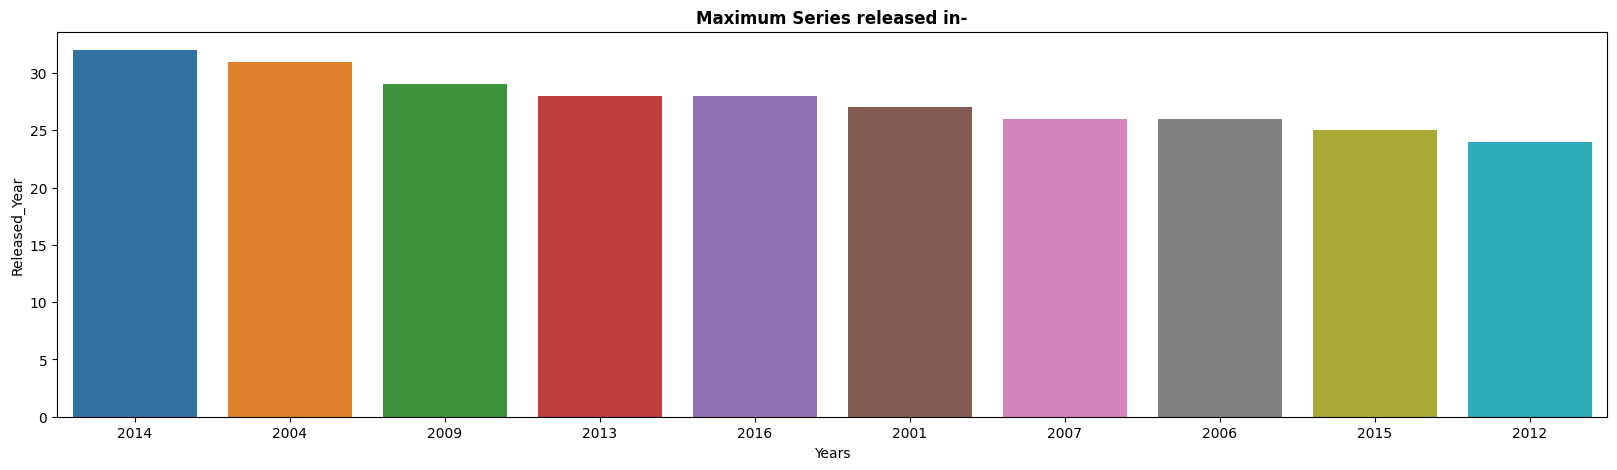

In [53]:
fig,axs=plt.subplots(figsize=(20,5))
g=sns.barplot(x=data['Released_Year'].value_counts()[:10].index,y=data['Released_Year'].value_counts()[:10])
g.set_title("Maximum Series released in-", weight = "bold")
g.set_xlabel("Years")
plt.show()

**IMDB Rating Distribution**

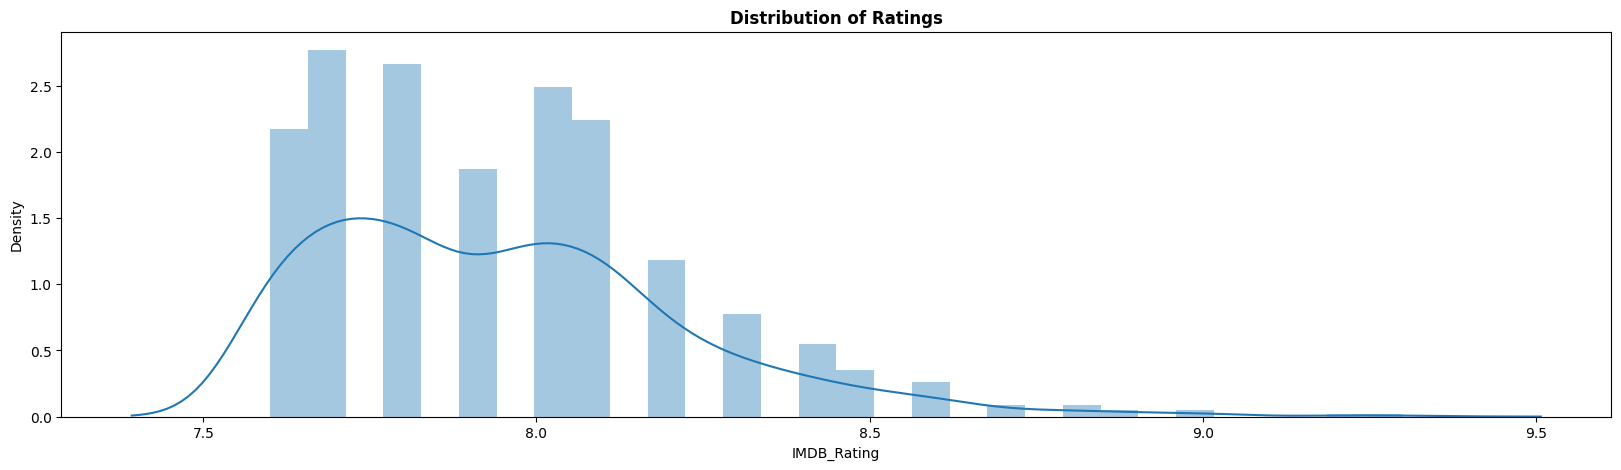

In [54]:
fig,axs=plt.subplots(figsize=(20,5))
g=sns.distplot(data['IMDB_Rating'],bins=30)
g.set_title("Distribution of Ratings", weight = "bold")
plt.show()